In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

## XGBoost Modelling

### Initial Model

In [2]:
train_test_data = pd.read_csv('../../../../data/train_test_data/train_test_data_new_rolling_avg.csv')

In [3]:
train_test_data.dropna(inplace=True)
train_test_data

,timestamp,rank,ticker,name,mentions,mentioning_users,upvotes,sentiment,rank_24h_ago,mentions_24h_ago,...,revenue_growth_ttm_yoy,dividend_exists,rank_percentage_change_24h,mentions_percentage_change_24h,opening_price,closing_price,label,sentiment_rolling_avg,upvotes_rolling_avg,mentioning_users_rolling_avg
0,2023-05-25,9,AAPL,Apple,90,71.0,441,58.0,8,45.0,...,-0.24000,1,0.125000,1.000000,172.41,172.99,1,58.000000,441.000000,71.000000
1,2023-05-29,10,AAPL,Apple,23,23.0,94,77.0,9,36.0,...,-0.24000,1,0.111111,-0.361111,173.32,175.43,1,77.000000,94.000000,23.000000
2,2023-05-30,9,AAPL,Apple,40,37.0,649,38.0,11,22.0,...,-0.24000,1,-0.181818,0.818182,176.96,177.30,1,57.500000,371.500000,30.000000
3,2023-06-01,8,AAPL,Apple,115,88.0,306,49.0,12,50.0,...,-0.24000,1,-0.333333,1.300000,177.70,180.09,1,43.500000,477.500000,62.500000
4,2023-06-02,5,AAPL,Apple,176,126.0,604,57.0,8,122.0,...,-0.24000,1,-0.375000,0.442623,181.03,180.95,0,53.000000,455.000000,107.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2023-07-13,7,TSLA,Tesla,110,92.0,1301,51.0,4,117.0,...,38.34000,0,0.750000,-0.059829,274.59,277.90,1,59.333333,907.333333,110.666667
386,2023-07-14,6,TSLA,Tesla,148,109.0,906,63.0,5,110.0,...,38.34000,0,0.200000,0.345455,277.01,281.38,1,62.666667,967.000000,98.666667
387,2023-05-29,12,TSM,TSMC,20,19.0,81,100.0,24,13.0,...,32.95000,1,-0.500000,0.538462,100.85,103.21,1,100.000000,81.000000,19.000000
388,2023-05-26,10,ULTA,ULTA Beauty,60,42.0,181,66.0,183,6.0,...,18.28000,0,-0.945355,9.000000,436.11,420.27,0,66.000000,181.000000,42.000000


In [4]:
# Remove columns that are not needed for modelling

train_test_data = train_test_data.drop(
    ['name', 
     'ticker', 
     'timestamp',
    'opening_price',
   'closing_price',
   'rank_24h_ago',
   'mentions_24h_ago',
   'rank', 'dividend_exists'
    ], axis=1).sort_values(
    by=['mentions'], 
    ascending=False)

In [5]:
train_test_data

,mentions,mentioning_users,upvotes,sentiment,beta,earnings_per_share_ttm,price_to_equity_ttm,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,rank_percentage_change_24h,mentions_percentage_change_24h,label,sentiment_rolling_avg,upvotes_rolling_avg,mentioning_users_rolling_avg
248,3216,1370.0,30860,57.0,1.770654,1.7415,173.5333,18.66000,0.052394,0.4956,0.2200,-0.666667,10.694545,0,57.000000,30860.0,1370.000000
45,1684,1076.0,10793,68.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.6000,0.000000,1.284939,0,71.333333,6439.0,656.666667
46,1401,856.0,8556,59.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.6000,0.000000,-0.170515,1,65.666667,8046.0,834.333333
41,1363,889.0,8328,68.0,2.707838,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.6000,1.000000,3.168196,0,68.000000,8328.0,889.000000
249,1268,738.0,24699,61.0,1.770654,1.7415,214.7679,18.66000,0.042127,0.4956,0.2200,0.000000,-0.584262,1,59.000000,27779.5,1054.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,16,15.0,161,83.0,0.995169,2.0614,18.2810,18.24000,0.000000,1.6717,27.2400,-0.517241,0.600000,0,83.000000,161.0,15.000000
343,16,14.0,76,100.0,0.886050,8.1536,9.7048,13.41000,4.833334,3.5598,107.4333,-0.562500,1.666667,1,100.000000,76.0,14.000000
20,15,14.0,56,70.0,1.188162,5.8857,31.1836,165.72000,0.513369,1.7635,-0.2400,0.666667,-0.758065,1,68.500000,194.5,39.000000
122,12,13.0,110,0.0,0.683394,1.0993,3.2375,7.49000,0.000000,0.9927,62.1500,-0.714286,0.200000,1,0.000000,110.0,13.000000


In [6]:
train_test_data.value_counts('label')

label
1    210
0    170
Name: count, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_test_data.drop('label', axis=1), train_test_data['label'], test_size=0.35, random_state=42)

In [8]:
# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47        61
           1       0.57      0.64      0.61        72

    accuracy                           0.55       133
   macro avg       0.54      0.54      0.54       133
weighted avg       0.54      0.55      0.54       133



### Hyper-parameter tuning

In [9]:
# xgboost hyperparameter tuning

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0, 100.0],
    'scale_pos_weight': [1, 3, 5]
}

# random search
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=3
)

random_search.fit(x_train, y_train)

print(random_search.best_estimator_)

print(random_search.best_params_)

print(random_search.best_score_)

y_pred = random_search.predict(x_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
{'scale_pos_weight': 5, 'reg_lambda': 1.0, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0}
0.48630007558578986
              precision    recall  f1-score   support

           0       0.56      0.23      0.33        61
           1       0.56      0.85

### Visuallizing feature importance

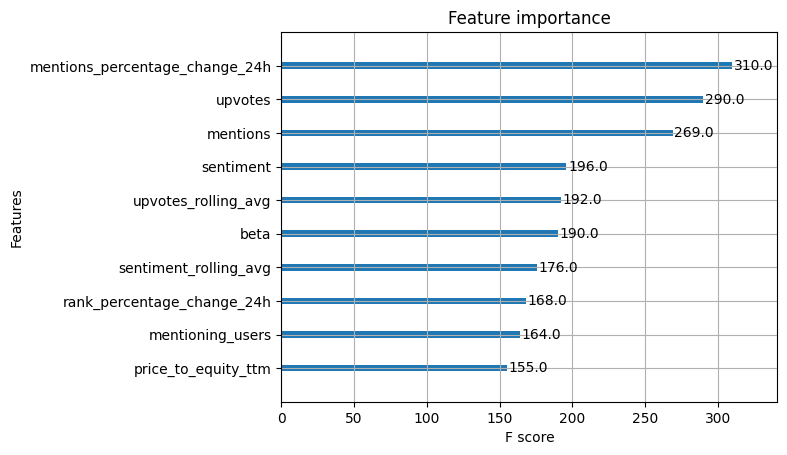

In [10]:
# visuallizing feature importnace

import matplotlib.pyplot as plt

xgb.plot_importance(random_search.best_estimator_, max_num_features=10)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()